# Sentiment Analysis of Election Tweets

## 1. Importing Libraries
    a. Importing the required libraries and preparing the notebook. 
    
## 2. Data Cleaning
    a. Sentiment_df (sentiment dataset) cleaning
    b. Election_df (election dataset) cleaning
    
## 3. Exploratory Data Analysis
    a. Sentiment_df Analysis
    b. Election_df Analysis
    c. Negative Reason tweet analysis

## 4. Model Preparation
    1. Model 0 - Logistic Regression
        a. Word Frequency (WF)
        b. TF-IDF
    2. Model 1 - Multinomial Naive Bayes
        a. Word Frequency (WF)
        b. TF-IDF
    3. Model 2 - Random Forest
        a. Word Frequency (WF)
        b. TF-IDF
    4. Model 3 - SVM (linearSVC)
        a. Word Frequency (WF)
        b. TF-IDF
    5. Model 4 - Decision Trees
        a. Word Frequency (WF)
        b. TF-IDF
    6. Model 5 - k-NN
        a. Word Frequency (WF)
        b. TF-IDF
    7. Model 6 - XGBoost
        a. Word Frequency (WF)
        b. TF-IDF

## 5. Model Implementation on Election dataset
    1. Model - SVM (linearSVC) - best model accuracy
        a. Word Frequency (WF)
        b. TF-IDF

## 6. Model Preparation and Implementation for Negative Sentiment reasons
    a. Word Frequency (WF)
        1. Model 0 - Logistic Regression
        2. Model 1 - Random Forest
        3. Model 2 - Multinomial Naive Bayes
        
    b. Hyperparameter Tuning
        1. Model 0 - Logistic Regression
        2. Model 1 - Random Forest
        3. Model 2 - Multinomial Naive Bayes
        
    c. Running Optimized Solution
        1. Model 0 - Logistic Regression with Optimized parameter
        2. Model 1 - Random Forest with Optimized parameters
        3. Model 2 - Multinomial naive bayes with Optimized parameter
        
    d. Result Analysis    

## 7. Bonus

# 1. Importing Libraries

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np

!pip install nltk
import nltk
import itertools
try:
    import emoji #If tweepy is already installed on the system
except:
    !pip install emoji

nltk.download("stopwords")
nltk.download('wordnet')

import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
import string
import matplotlib.pyplot as plt
import seaborn as sns

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import html

!pip install xgboost
!pip install --upgrade xgboost
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 1.4MB 12.8MB/s eta 0:00:01
     |████████████████████████████████| 307kB 7.6MB/s eta 0:00:01
     |████████████████████████████████| 675kB 10.0MB/s eta 0:00:01     |█████████████▎                  | 276kB 10.0MB/s eta 0:00:01
     |████████████████████████████████| 81kB 7.8MB/s  eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
     |████████████████████████████████| 133kB 7.5MB/s eta 0:00:01


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyterlab/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/jupyterlab/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


     |████████████████████████████████| 368kB 3.9MB/s eta 0:00:01
     |████████████████████████████████| 157.5MB 51kB/s  eta 0:00:011  |▌                               | 2.6MB 1.5MB/s eta 0:01:41     |▋                               | 3.0MB 1.5MB/s eta 0:01:41     |██                              | 9.3MB 6.1MB/s eta 0:00:25     |██▎                             | 11.4MB 2.9MB/s eta 0:00:51     |██▍                             | 12.0MB 2.9MB/s eta 0:00:51     |███▉                            | 19.0MB 5.7MB/s eta 0:00:25     |█████▏                          | 25.7MB 2.9MB/s eta 0:00:46     |█████▊                          | 28.2MB 3.0MB/s eta 0:00:44     |███████▌                        | 36.8MB 6.1MB/s eta 0:00:20     |████████▎                       | 40.7MB 5.2MB/s eta 0:00:23�███████████▎               | 80.2MB 2.9MB/s eta 0:00:27     |█████████████████▏              | 84.6MB 1.9MB/s eta 0:00:39     |███████████████████▊            | 97.0MB 6.0MB/s eta 0:00:11     |██████████████████

# 2. Data Cleaning

## Sentiment_df cleaning

In [3]:
# Reading Dataset
sentiment_df = pd.read_csv('sentiment_analysis.csv')
sentiment_original = sentiment_df.copy()
election_df = pd.read_csv('Canadian_elections_2019.csv')
election_original = election_df.copy()

print(sentiment_df.head())
print(election_df.head())

             ID                                               text  label
0  7.680980e+17  Josh Jenkins is looking forward to TAB Breeder...      1
1  7.680980e+17  RT @MianUsmanJaved: Congratulations Pakistan o...      1
2  7.680980e+17  RT @PEPalerts: This September, @YESmag is taki...      1
3  7.680980e+17  RT @david_gaibis: Newly painted walls, thanks ...      1
4  7.680980e+17  RT @CedricFeschotte: Excited to announce: as o...      1
  sentiment                      negative_reason  \
0  negative  Women Reproductive right and Racism   
1  positive                                  NaN   
2  negative                              Economy   
3  positive                                  NaN   
4  negative                              Economy   

                                                text  
0  b"@RosieBarton So instead of your suggestion, ...  
1  b"#AllWomanSpacewalk it's real!\n@Space_Statio...  
2  b"#Brantford It's going to cost YOU $94 BILLIO...  
3  b"#Canada #CanadaEle

In [4]:
sentiment_df.isnull().sum()

ID       0
text     0
label    0
dtype: int64

There are 0 null elements in the sentiment dataset. 

In [5]:
election_df.isnull().sum()

sentiment             0
negative_reason    1126
text                  0
dtype: int64

There are 1126 null elements in the negative_reason column in the election dataset. 

In [6]:
election_df['sentiment'].unique()

array(['negative', 'positive'], dtype=object)

In [7]:
elect_check = election_df[election_df['negative_reason'].isnull()]
elect_check['sentiment'].value_counts()

positive    1126
Name: sentiment, dtype: int64

It is observed that there is no missing values in sentiment_df dataset. Moreover, the missing values in election_df dataset is for reason for positive sentiment. 
So, there is 0% missingness. 
As sentiment_df dataset does not have any missing values, it can be assured that the missing values in election_df does not have any negative sentiment in text column. 

Now, the sentiment_df dataset is cleaned and prepared for the analysis.

In [8]:
# Removing punctuation
sentiment_df['text'] = sentiment_df['text'].replace(to_replace='http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',value='',regex=True)

In [9]:
# Defining a function to remove the specific patterns
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

In [10]:
# Remove the tagline starting with '@'
sentiment_df['text'] = np.vectorize(remove_pattern)(sentiment_df['text'], "@[\w]*")

In [11]:
# Replace punctuation with ' '
sentiment_df['text_n'] = sentiment_df['text'].str.replace("[^a-zA-Z1-9#]", " ")

In [12]:
# Html to ASCII
sentiment_df['text_n'] = html.unescape(sentiment_df['text_n'])

In [13]:
# converting words in lowercase
sentiment_df['text_n'] = sentiment_df['text_n'].str.lower()

In [14]:
# removing short words whose length is less than or equal to 3 characters
sentiment_df['text_n'] = sentiment_df['text_n'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

**StopWords**: These are imported from the nltk corpus library. 

In [15]:
# tokenizing the tweet and removing the stopwords
stop = stopwords.words('english')
sentiment_df['text_without_sw'] = sentiment_df['text_n'].apply(lambda x: [item for item in x.split() if item not in stop])

**Stemming**:  Stemming is the process of converting words into root/base word. It chops of the word from the end until the base word is reached. It sometimes creates word without having any meaning. 

**Lemmatization**: Lemmatizatin considers a language's full vocabulary to apply a morphological analysis to words. It is much more informative than simple stemming. The lemma of 'was' is 'be' and the lemma of 'mice' is 'mouse'. 

<br>
For this case, only lemmatization is applied so that the meaningful words should be there in the dataset. 

In [16]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
sentiment_df['text_cleaned'] = sentiment_df['text_without_sw'].apply(lambda x: [wnl.lemmatize(i) for i in x])
sentiment_df.head()

,ID,text,label,text_n,text_without_sw,text_cleaned
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,josh jenkins looking forward breeders crown su...,"[josh, jenkins, looking, forward, breeders, cr...","[josh, jenkins, looking, forward, breeder, cro..."
1,7.680980e+17,RT : Congratulations Pakistan on becoming #No1...,1,congratulations pakistan becoming #no1testteam...,"[congratulations, pakistan, becoming, #no1test...","[congratulation, pakistan, becoming, #no1testt..."
2,7.680980e+17,"RT : This September, is taking you to Maine M...",1,this september taking maine mendoza surprise t...,"[september, taking, maine, mendoza, surprise, ...","[september, taking, maine, mendoza, surprise, ..."
3,7.680980e+17,"RT : Newly painted walls, thanks a million to ...",1,newly painted walls thanks million custodial p...,"[newly, painted, walls, thanks, million, custo...","[newly, painted, wall, thanks, million, custod..."
4,7.680980e+17,RT : Excited to announce: as of July 2017 Fesc...,1,excited announce july feschotte will relocating,"[excited, announce, july, feschotte, relocating]","[excited, announce, july, feschotte, relocating]"


## Election_df cleaning

Applying the same procedure as the sentiment dataset to clean the election dataset. 

In [17]:
# Removing punctuation
election_df['text1'] = election_df['text'].replace(to_replace='http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',value='',regex=True)

In [18]:
# Removing taglines, punctuation, converting html to ascii, converting to lowercase and removing the string with less than 3 characters
election_df['text1'] = np.vectorize(remove_pattern)(election_df['text1'], "@[\w]*")
election_df['text1'] = election_df['text1'].str.replace("[^a-zA-Z1-9#]", " ")
election_df['text1'] = html.unescape(election_df['text1'])
election_df['text1'] = election_df['text1'].str.lower()
election_df['text1'] = election_df['text1'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [19]:
# tokenizing the tweet and removing the stopwords
stop = stopwords.words('english')
election_df['text1_wo_sw'] = election_df['text1'].apply(lambda x: [item for item in x.split() if item not in stop])

In [20]:
# Lemmatization
wnl = nltk.WordNetLemmatizer()
election_df['text_cleaned'] = election_df['text1_wo_sw'].apply(lambda x: [wnl.lemmatize(i) for i in x])
election_df.head()

,sentiment,negative_reason,text,text1,text1_wo_sw,text_cleaned
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",instead your suggestion about agree that #cana...,"[instead, suggestion, agree, #canadian, #women...","[instead, suggestion, agree, #canadian, #women..."
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",#allwomanspacewalk real n#etobicokenorth #city...,"[#allwomanspacewalk, real, n#etobicokenorth, #...","[#allwomanspacewalk, real, n#etobicokenorth, #..."
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",#brantford going cost billion next years justi...,"[#brantford, going, cost, billion, next, years...","[#brantford, going, cost, billion, next, year,..."
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",#canada #canadaelection2 #canadavotes n#elxn43...,"[#canada, #canadaelection2, #canadavotes, n#el...","[#canada, #canadaelection2, #canadavotes, n#el..."
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",#canada #taxpayers sick tired having their har...,"[#canada, #taxpayers, sick, tired, hard, earne...","[#canada, #taxpayers, sick, tired, hard, earne..."


# 3. Exploratory Data Analysis

## Sentiment_df Analysis

Text(0, 320000, '1 - Positive sentiment ')

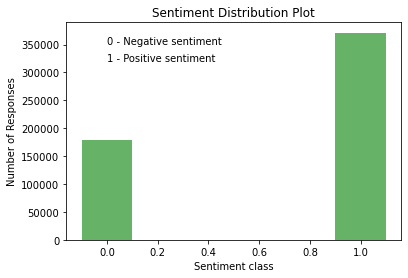

In [21]:
plt.bar(sentiment_df.label.unique(), sentiment_df.label.value_counts(), width = 0.2, alpha = 0.6, color='green')
plt.title('Sentiment Distribution Plot')
plt.xlabel('Sentiment class')
plt.ylabel('Number of Responses')
plt.text(0, 350000, '0 - Negative sentiment')
plt.text(0, 320000, '1 - Positive sentiment ')

It is observed that the positive tweets are nearly twice to that of the negative tweets. 

In [22]:
sentiment_df['length'] = sentiment_df['text'].apply(len)
sentiment_df.head()

,ID,text,label,text_n,text_without_sw,text_cleaned,length
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,josh jenkins looking forward breeders crown su...,"[josh, jenkins, looking, forward, breeders, cr...","[josh, jenkins, looking, forward, breeder, cro...",68
1,7.680980e+17,RT : Congratulations Pakistan on becoming #No1...,1,congratulations pakistan becoming #no1testteam...,"[congratulations, pakistan, becoming, #no1test...","[congratulation, pakistan, becoming, #no1testt...",110
2,7.680980e+17,"RT : This September, is taking you to Maine M...",1,this september taking maine mendoza surprise t...,"[september, taking, maine, mendoza, surprise, ...","[september, taking, maine, mendoza, surprise, ...",108
3,7.680980e+17,"RT : Newly painted walls, thanks a million to ...",1,newly painted walls thanks million custodial p...,"[newly, painted, walls, thanks, million, custo...","[newly, painted, wall, thanks, million, custod...",113
4,7.680980e+17,RT : Excited to announce: as of July 2017 Fesc...,1,excited announce july feschotte will relocating,"[excited, announce, july, feschotte, relocating]","[excited, announce, july, feschotte, relocating]",83


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

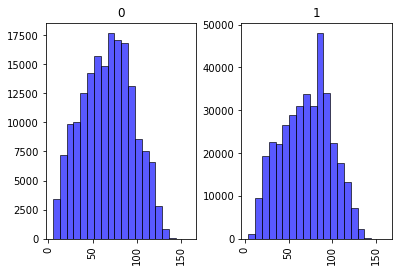

In [23]:
sentiment_df.hist('length', by=sentiment_df['label'], bins=20, edgecolor='k', alpha = 0.65, color='b')

In the above plot, the length of tweets is calculated and the histogram is plotted. For the negative tweets, most of the tweets have lenght in between 50 to 100 characters. While that for the positive tweets, the range for most of the tweets is nearly from 30 to 100 and there is high peak near the lenght of 90 characters. 

Word Cloud: The wordcloud analysis is done from the column without stopwords. For this analysis, the lemmatization is not considered because the lemmatization will change the word's original form. 

In [24]:
# Joining the tokenized sentence
sentiment_df['sent_cleaned'] = sentiment_df['text_without_sw'].str.join(' ')
sentiment_df.head()

,ID,text,label,text_n,text_without_sw,text_cleaned,length,sent_cleaned
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,josh jenkins looking forward breeders crown su...,"[josh, jenkins, looking, forward, breeders, cr...","[josh, jenkins, looking, forward, breeder, cro...",68,josh jenkins looking forward breeders crown su...
1,7.680980e+17,RT : Congratulations Pakistan on becoming #No1...,1,congratulations pakistan becoming #no1testteam...,"[congratulations, pakistan, becoming, #no1test...","[congratulation, pakistan, becoming, #no1testt...",110,congratulations pakistan becoming #no1testteam...
2,7.680980e+17,"RT : This September, is taking you to Maine M...",1,this september taking maine mendoza surprise t...,"[september, taking, maine, mendoza, surprise, ...","[september, taking, maine, mendoza, surprise, ...",108,september taking maine mendoza surprise thanks...
3,7.680980e+17,"RT : Newly painted walls, thanks a million to ...",1,newly painted walls thanks million custodial p...,"[newly, painted, walls, thanks, million, custo...","[newly, painted, wall, thanks, million, custod...",113,newly painted walls thanks million custodial p...
4,7.680980e+17,RT : Excited to announce: as of July 2017 Fesc...,1,excited announce july feschotte will relocating,"[excited, announce, july, feschotte, relocating]","[excited, announce, july, feschotte, relocating]",83,excited announce july feschotte relocating


In [25]:
sent_list_neg = sentiment_df[sentiment_df['label']==0]['sent_cleaned'].tolist()
sent_unite_neg = ' '.join(sent_list_neg)

In [26]:
sent_list_pos = sentiment_df[sentiment_df['label']==1]['sent_cleaned'].tolist()
sent_unite_pos = ' '.join(sent_list_pos)

Text(0.5, 1.0, 'Sentiment_df Negative Tweets WordCloud')

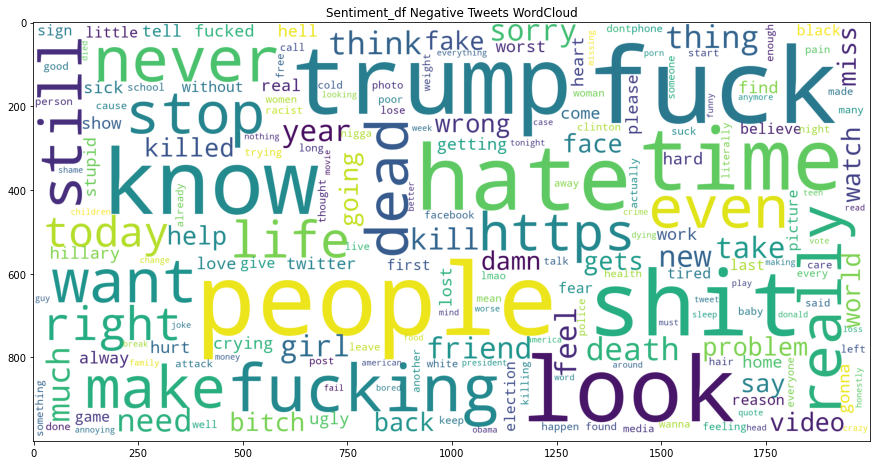

In [27]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud(background_color='white', 
                     scale = 5,
                     max_font_size=50,
                     collocations = False).generate(sent_unite_neg)) 
plt.title('Sentiment_df Negative Tweets WordCloud')

Mostly, the negative tweets have the words like 'fuck', 'trump', 'hate', 'look', 'fucking', 'dead', 'time', 'shit', 'never', etc. and all negative words. 

Text(0.5, 1.0, 'Sentiment_df Positive Tweets wordcloud')

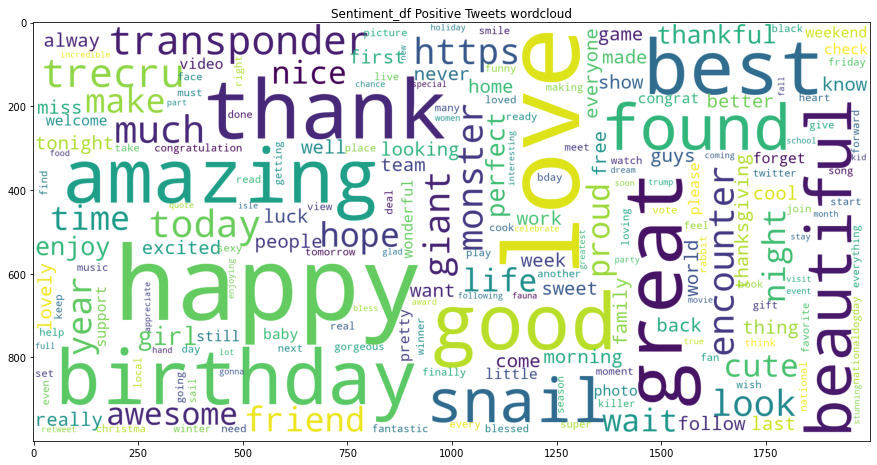

In [28]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud(background_color='white',
                     scale = 5,
                     max_font_size=50,
                     collocations = False).generate(sent_unite_pos)) 
plt.title('Sentiment_df Positive Tweets wordcloud')

Mostly, the positive tweets have words like 'love', 'birthday', 'good', 'found', 'amazing', 'great', 'beautiful', 'happy', 'best', etc. and all other positive words. 

# Election_df Analysis

Text(0, 0.5, 'Number of Responses')

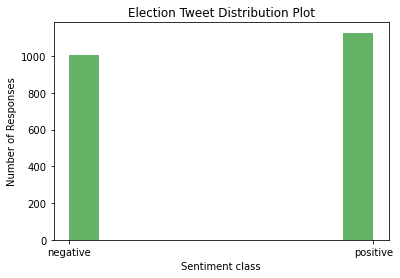

In [58]:
plt.hist(election_df.sentiment, alpha = 0.6, color='green')
plt.title('Election Tweet Distribution Plot')
plt.xlabel('Sentiment class')
plt.ylabel('Number of Responses')

For the election dataset, most of the election label is postive. But the ratio is near to 1. 

In [30]:
election_df['length'] = election_df['text'].apply(len)
election_df.head()

,sentiment,negative_reason,text,text1,text1_wo_sw,text_cleaned,length
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",instead your suggestion about agree that #cana...,"[instead, suggestion, agree, #canadian, #women...","[instead, suggestion, agree, #canadian, #women...",285
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",#allwomanspacewalk real n#etobicokenorth #city...,"[#allwomanspacewalk, real, n#etobicokenorth, #...","[#allwomanspacewalk, real, n#etobicokenorth, #...",125
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",#brantford going cost billion next years justi...,"[#brantford, going, cost, billion, next, years...","[#brantford, going, cost, billion, next, year,...",131
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",#canada #canadaelection2 #canadavotes n#elxn43...,"[#canada, #canadaelection2, #canadavotes, n#el...","[#canada, #canadaelection2, #canadavotes, n#el...",116
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",#canada #taxpayers sick tired having their har...,"[#canada, #taxpayers, sick, tired, hard, earne...","[#canada, #taxpayers, sick, tired, hard, earne...",309


array([<AxesSubplot:title={'center':'negative'}>,
       <AxesSubplot:title={'center':'positive'}>], dtype=object)

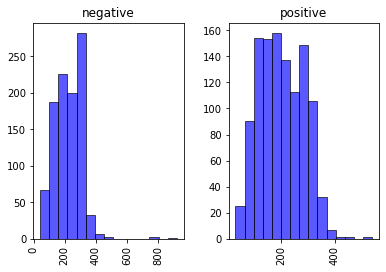

In [31]:
election_df.hist('length', by=election_df['sentiment'], bins=15, edgecolor='k', alpha = 0.65, color='b')

For negative tweets, mostly has length in range less than 400 characters. While that for positive tweets, distribution is nearly similar less than 400 characters. 

In [32]:
election_df['sent_cleaned'] = election_df['text1_wo_sw'].str.join(' ')
election_df.head()

,sentiment,negative_reason,text,text1,text1_wo_sw,text_cleaned,length,sent_cleaned
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",instead your suggestion about agree that #cana...,"[instead, suggestion, agree, #canadian, #women...","[instead, suggestion, agree, #canadian, #women...",285,instead suggestion agree #canadian #women trus...
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",#allwomanspacewalk real n#etobicokenorth #city...,"[#allwomanspacewalk, real, n#etobicokenorth, #...","[#allwomanspacewalk, real, n#etobicokenorth, #...",125,#allwomanspacewalk real n#etobicokenorth #city...
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",#brantford going cost billion next years justi...,"[#brantford, going, cost, billion, next, years...","[#brantford, going, cost, billion, next, year,...",131,#brantford going cost billion next years justi...
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",#canada #canadaelection2 #canadavotes n#elxn43...,"[#canada, #canadaelection2, #canadavotes, n#el...","[#canada, #canadaelection2, #canadavotes, n#el...",116,#canada #canadaelection2 #canadavotes n#elxn43...
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",#canada #taxpayers sick tired having their har...,"[#canada, #taxpayers, sick, tired, hard, earne...","[#canada, #taxpayers, sick, tired, hard, earne...",309,#canada #taxpayers sick tired hard earned dona...


In [33]:
e_df = election_df[['sentiment', 'negative_reason', 'text1_wo_sw', 'text_cleaned', 'length']]
e_df

,sentiment,negative_reason,text1_wo_sw,text_cleaned,length
0,negative,Women Reproductive right and Racism,"[instead, suggestion, agree, #canadian, #women...","[instead, suggestion, agree, #canadian, #women...",285
1,positive,NaN,"[#allwomanspacewalk, real, n#etobicokenorth, #...","[#allwomanspacewalk, real, n#etobicokenorth, #...",125
2,negative,Economy,"[#brantford, going, cost, billion, next, years...","[#brantford, going, cost, billion, next, year,...",131
3,positive,NaN,"[#canada, #canadaelection2, #canadavotes, n#el...","[#canada, #canadaelection2, #canadavotes, n#el...",116
4,negative,Economy,"[#canada, #taxpayers, sick, tired, hard, earne...","[#canada, #taxpayers, sick, tired, hard, earne...",309
...,...,...,...,...,...
2128,negative,Scandal,"[know, good, enough, smearing, campaign, right...","[know, good, enough, smearing, campaign, right...",245
2129,negative,Scandal,"[missed, comment, deflecting, issue, answer, b...","[missed, comment, deflecting, issue, answer, b...",284
2130,positive,NaN,"[daily, reminder, endorses, strategic, voting,...","[daily, reminder, endorses, strategic, voting,...",134
2131,negative,Women Reproductive right and Racism,"[going, reopen, abortion, debate, n#elxn43, #s...","[going, reopen, abortion, debate, n#elxn43, #s...",129


In [34]:
elect_list_neg = election_df[election_df['sentiment']=='negative']['sent_cleaned'].tolist()
elect_unite_neg = ' '.join(elect_list_neg)

In [35]:
elect_list_pos = election_df[election_df['sentiment']=='positive']['sent_cleaned'].tolist()
elect_unite_pos = ' '.join(elect_list_pos)

Text(0.5, 1.0, 'Election_df Negative Tweets Wordcloud')

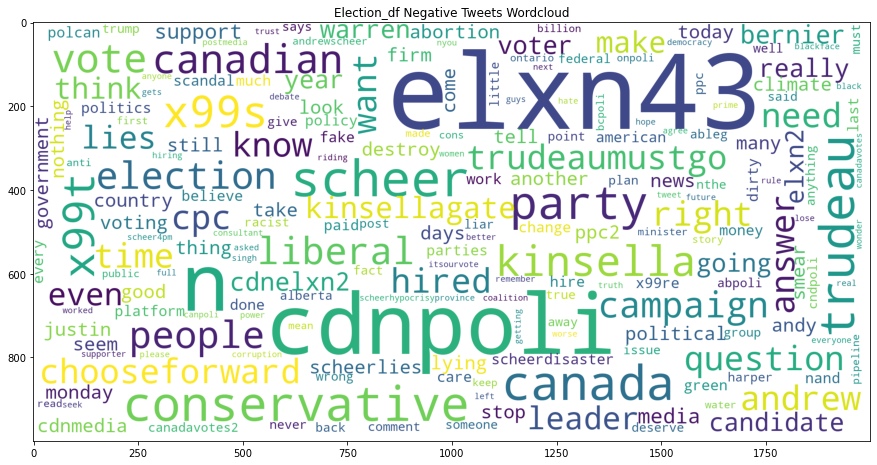

In [36]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud(background_color='white',
                     scale = 5,
                     max_font_size=50,
                     collocations = False).generate(elect_unite_neg)) 
plt.title('Election_df Negative Tweets Wordcloud')

Mostly for the negative election tweets, the words used are 'conservative', 'trudeau', 'canada', 'liberal', 'canadian', and others. 
<br> 'elxn43' and 'cdnpoli' are there in every tweets and it is also there in postive tweets. 

Text(0.5, 1.0, 'Election_df Positive Tweets Wordcloud')

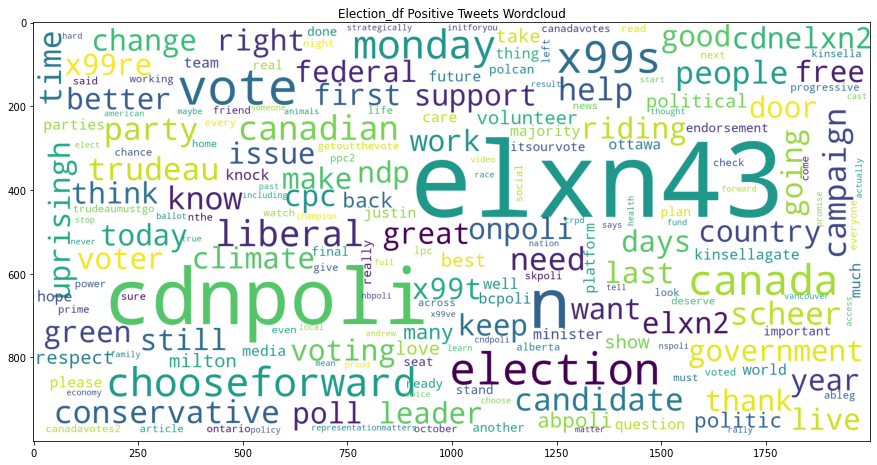

In [37]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud(background_color='white',
                     scale = 5,
                     max_font_size=50,
                     collocations = False).generate(elect_unite_pos)) 
plt.title('Election_df Positive Tweets Wordcloud')

Mostly for the positive tweets, the words used are 'election', 'chooseforward', 'vote', 'liberal', and others. 
<br> 'elxn43' and 'cdnpoli' are there in every tweets mostly. 

### Negative sentiment reason analysis

In [38]:
# Analysing the distribution of the negative reason
ng_reason = election_df.negative_reason.unique()
ng_reason = np.delete(ng_reason, 1)
ng_reason

array(['Women Reproductive right and Racism', 'Economy', 'Others',
       'Scandal', 'Tell lies', 'Privilege', 'Climate Problem',
       'Healthcare', 'Separation', 'Healthcare and Marijuana'],
      dtype=object)

Text(0.5, 1.0, 'Distribution of reasons for negative sentiments')

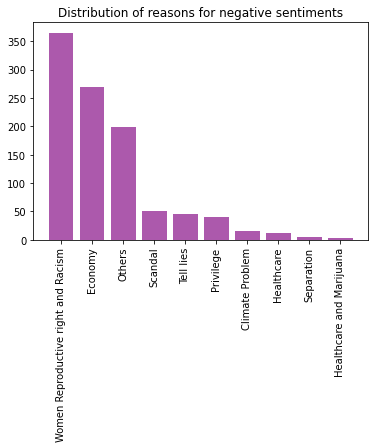

In [39]:
plt.bar(ng_reason, election_df.negative_reason.value_counts(), alpha = 0.65, color='purple')
plt.xticks(rotation=90)
plt.title('Distribution of reasons for negative sentiments')

It is observed that more than 350 tweets have negative reason as Women Reproductive right and Racism while healthcare and marijuana is at the last. 

Now, the tweets are separated for the party it is directed. The group of party is decided based on the analysis of the tweets. The hashtags in the tweets are observed below and anlysed. Based on that the key words for the particular party is decided and the group of parties is separated. 

In [40]:
elect_words_join = election_df['text1_wo_sw'].str.join(' ').tolist()

In [41]:
hashtags = [re.findall('#\w+', i) for i in elect_words_join]

In [42]:
hashtags1 = (list(itertools.chain.from_iterable(hashtags)))

In [43]:
fdist = FreqDist(hashtags1)
print(fdist)

<FreqDist with 1090 samples and 6871 outcomes>


These words are selected manually for the different political parties based on the 1000 most common hashtags:

1. Conservative Party: cpc, scheer, andrewscheer, scheer4pm, conservatives, conservative, scheermajority, cpcmajority, scheer2, conservativeparty, andrew, scheerlies, scheerdisaster, scheerhypocrisy, stopscheer, lyingandy, neverscheer, anxiousandrew, scheerdesperation, scheercuts, scheeramerican, nocpc, cpc19, scheernonsense, scheerrepublican, conservativeparty, anythingbutconservative

2. NDP: ndp, jagmeetsingh, votendp, singhsurge, singhupswing, imwithjagmeet, ndp2, singh, teamjagmeet, democratic

3. Liberal Party: lpc, kinsella, chooseforwardwithtrudeau, trudeau, teamtrudeau, liberals, warrenkinsella, votingliberal, istandwithtrudeau, liberal, justintrudeau, liberalparty, trudeauesque, justin, trudeaumustgo, trudeaublackfire, trudeauworstpm, trudeaucorruption, votingliberal, kinsellouts, nottrustinjustin, liberalmustgo, liberalliesanddeception, trudeauhypocrite, trudeaumustresign, twoplanetrudeau, trudeauthehypocrite, maximetrudeau, justinjournos  

4. Green Party Canada: gpc, greenparty, votegreen, greens, votegreen2, greennewdeal, thereisnogreenwave

In [44]:
lpc = ['lpc', 'kinsella', 'chooseforwardwithtrudeau','trudeau','teamtrudeau','liberals','warrenkinsella','votingliberal','istandwithtrudeau','liberal','justintrudeau','liberalparty','trudeauesque','justin','trudeaumustgo','trudeaublackfire','trudeauworstpm','trudeaucorruption','votingliberal','kinsellouts','nottrustinjustin','liberalmustgo','liberalliesanddeception','trudeauhypocrite','trudeaumustresign','twoplantrudeau','trudeauthehypocrite','maximetrudeau','justinjournos']
cpc = ['cpc','scheer','andrewscheer','scheer4pm','conservatives','conservative','scheermajority','cpcmajority','scheer2','conservativeparty','andrew','scheerlies','scheerdisaster','scheerhypocrisy','stopscheer','lyingandy','neverscheer','anxiousandrew','scheerdesperation','scheercuts','scheeramerican','nocpc','cpc19','scheernonsense','scheerrepublican','conservativeparty','anythingbutconservative']
ndp = ['ndp','jagmeetsingh','votendp','singhsurge','singhupswing','imwithjagmeet','ndp2','singh','teamjagmeet','democratic']
gpc = ['gpc','greenparty','votegreen','greens','votegreen2','greennewdeal','thereisnogreenwave']

In [45]:
e_df['party'] = '0'
for i in range((e_df['text1_wo_sw'].shape)[0]):
    if (any(word in e_df['text1_wo_sw'][i] for word in lpc) & any(word in e_df['text1_wo_sw'][i] for word in cpc)):
        e_df['party'][i] = 'Lpc & Cpc'
    elif any(word in e_df['text1_wo_sw'][i] for word in lpc):
        e_df['party'][i] = 'Liberal'
    elif any(word in e_df['text1_wo_sw'][i] for word in cpc):
        e_df['party'][i] = 'Conservative'
    elif any(word in e_df['text1_wo_sw'][i] for word in ndp):
        e_df['party'][i] = 'Democratic'
    elif any(word in e_df['text1_wo_sw'][i] for word in gpc):
        e_df['party'][i] = 'GPC'
    else:
        e_df['party'][i] = 'None'

In [46]:
e_df['party'].value_counts()

None            1541
Liberal          254
Conservative     214
Lpc & Cpc         92
Democratic        19
GPC               13
Name: party, dtype: int64

Text(0, 0.5, 'Frequency of tweet')

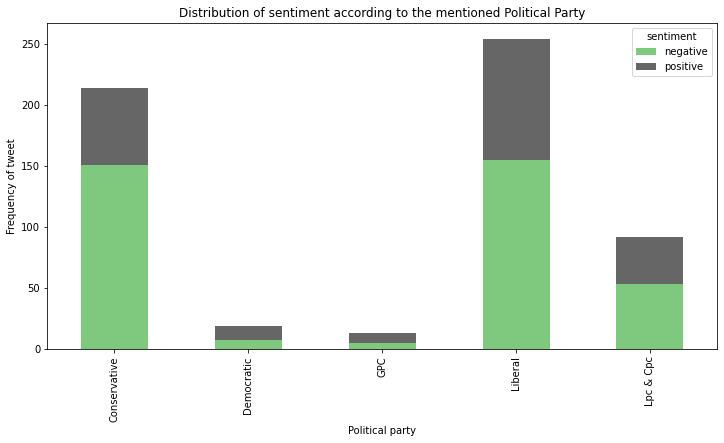

In [47]:
e_df2 = e_df[e_df['party'] != 'None']
e_df2['ct'] = 1
e_df2 = pd.pivot_table(e_df2, values = 'ct', index='party', columns='sentiment', aggfunc = np.sum, fill_value=0)
ax = e_df2.plot.bar(stacked=True, figsize = (12,6), colormap='Accent')
ax.set_title('Distribution of sentiment according to the mentioned Political Party')
ax.set_xlabel('Political party')
ax.set_ylabel('Frequency of tweet')

Here, the None party is removed from the analysis because it is better to analyse the distribution among the given parties. 
<br>
Most of the tweets are directed to liberals and conservative and those are mainly negative tweets. The GPC, democratice and the tweets containing LPC and CPC together are lesser in count. 

In [48]:
e_df2['Total'] = e_df2['negative'] + e_df2['positive']
e_df2['neg_perc'] = (e_df2['negative']/e_df2['Total'])*100
e_df2['pos_perc'] = (e_df2['positive']/e_df2['Total'])*100
e_df2

sentiment,negative,positive,Total,neg_perc,pos_perc
party,,,,,
Conservative,151,63,214,70.560748,29.439252
Democratic,8,11,19,42.105263,57.894737
GPC,5,8,13,38.461538,61.538462
Liberal,155,99,254,61.023622,38.976378
Lpc & Cpc,53,39,92,57.608696,42.391304


Text(0, 0.5, 'Ratio of Pos/Neg sentiment percentage')

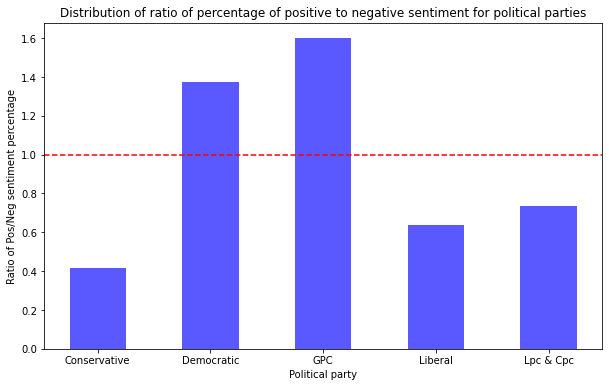

In [49]:
plt.figure(figsize=(10,6))
plt.bar(x=e_df2.index, height=(e_df2.pos_perc/e_df2.neg_perc), color='blue', width=0.5, alpha=0.65)
plt.axhline(y=1, color='r', linestyle='--')
plt.title('Distribution of ratio of percentage of positive to negative sentiment for political parties')
plt.xlabel('Political party')
plt.ylabel('Ratio of Pos/Neg sentiment percentage')

* Ratio > 1 == more positive tweets than negative tweets
* Ratio < 1 == less positive tweets than negative tweets
<br>

This ratio shows that the Democratic and GPC party has more positive tweets than negative tweets. Though their number of tweets is very less compared to other parties. 

# 4. Model Preparation

In [60]:
sentiment_df['model_cleaned'] = sentiment_df['text_cleaned'].str.join(' ')
sentiment_df.head()

,ID,text,label,text_n,text_without_sw,text_cleaned,length,sent_cleaned,model_cleaned
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,josh jenkins looking forward breeders crown su...,"[josh, jenkins, looking, forward, breeders, cr...","[josh, jenkins, looking, forward, breeder, cro...",68,josh jenkins looking forward breeders crown su...,josh jenkins looking forward breeder crown sup...
1,7.680980e+17,RT : Congratulations Pakistan on becoming #No1...,1,congratulations pakistan becoming #no1testteam...,"[congratulations, pakistan, becoming, #no1test...","[congratulation, pakistan, becoming, #no1testt...",110,congratulations pakistan becoming #no1testteam...,congratulation pakistan becoming #no1testteam ...
2,7.680980e+17,"RT : This September, is taking you to Maine M...",1,this september taking maine mendoza surprise t...,"[september, taking, maine, mendoza, surprise, ...","[september, taking, maine, mendoza, surprise, ...",108,september taking maine mendoza surprise thanks...,september taking maine mendoza surprise thanks...
3,7.680980e+17,"RT : Newly painted walls, thanks a million to ...",1,newly painted walls thanks million custodial p...,"[newly, painted, walls, thanks, million, custo...","[newly, painted, wall, thanks, million, custod...",113,newly painted walls thanks million custodial p...,newly painted wall thanks million custodial pa...
4,7.680980e+17,RT : Excited to announce: as of July 2017 Fesc...,1,excited announce july feschotte will relocating,"[excited, announce, july, feschotte, relocating]","[excited, announce, july, feschotte, relocating]",83,excited announce july feschotte relocating,excited announce july feschotte relocating


In [61]:
X = sentiment_df['model_cleaned']
y = sentiment_df['label']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(385273,)
(165118,)
(385273,)
(165118,)


## WF

Here, the frequency of word is used as one of the method for the feature. CountVectorizer is used for this purpose. 

In [64]:
# Taking max features to be 2000
ct_vectorise = CountVectorizer(max_features = 2000)
ct_vectorise.fit_transform(X)
X_ct_train = ct_vectorise.transform(X_train)
X_ct_test = ct_vectorise.transform(X_test)
ct_features = ct_vectorise.get_feature_names()

## TF-IDF

Here, the TF-IDF feature method is considered. All the 7 models are developed separately for these two methods. 

In [65]:
tfidf_vectorise = TfidfVectorizer(max_features = 2000)
tfidf_vectorise.fit_transform(X)
X_tfidf_train = tfidf_vectorise.transform(X_train)
X_tfidf_test = tfidf_vectorise.transform(X_test)
tfidf_features = tfidf_vectorise.get_feature_names()

In [66]:
# Assigning accuracy and f1 score vector
ACC_WF = []
ACC_TF = []
f1_WF = []
f1_TF = []

## Model 0 - Logistic Regression

In [67]:
def log_regression(X_train, y_train, X_test, y_test):
    logreg = LogisticRegression(random_state=42, solver='saga', C=0.01)
    logreg = logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('accuracy score is ', accuracy_score(y_test, y_pred))
    print('f1 score is ', f1_score(y_test, y_pred))
    return accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), logreg


### WF

In [68]:
Lr_wf_acc, Lr_wf_f1, logreg = log_regression(X_ct_train, y_train, X_ct_test, y_test)
ACC_WF.append(Lr_wf_acc)
f1_WF.append(Lr_wf_f1)

Accuracy of logistic regression classifier on test set: 0.93
Accuracy of logistic regression classifier on train set: 0.93
Confusion matrix:
[[ 49673   4050]
 [  6868 104527]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     53723
           1       0.96      0.94      0.95    111395

   micro avg       0.93      0.93      0.93    165118
   macro avg       0.92      0.93      0.93    165118
weighted avg       0.94      0.93      0.93    165118

accuracy score is  0.9338775905715913
f1 score is  0.9503664102703981


### TF-IDF

In [69]:
Lr_tf_acc, Lr_tf_f1, logreg = log_regression(X_tfidf_train, y_train, X_tfidf_test, y_test)
ACC_TF.append(Lr_tf_acc)
f1_TF.append(Lr_tf_f1)

Accuracy of logistic regression classifier on test set: 0.92
Accuracy of logistic regression classifier on train set: 0.92
Confusion matrix:
[[ 44842   8881]
 [  3743 107652]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.88     53723
           1       0.92      0.97      0.94    111395

   micro avg       0.92      0.92      0.92    165118
   macro avg       0.92      0.90      0.91    165118
weighted avg       0.92      0.92      0.92    165118

accuracy score is  0.9235455855812207
f1 score is  0.9446140886595767


## Model 1 - Multinomial Naive Bayes

In [70]:
from sklearn.naive_bayes import MultinomialNB
def naive_bayes(X_train, y_train, X_test, y_test):
    nb = MultinomialNB()
    nb = nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    print('Accuracy of multinomial naive bayes classifier on test set: {:.2f}'.format(nb.score(X_test, y_test)))
    print('Accuracy of multinomial naive bayes classifier on train set: {:.2f}'.format(nb.score(X_train, y_train)))
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('accuracy score is ', accuracy_score(y_test, y_pred))
    print('f1 score is ', f1_score(y_test, y_pred))
    return accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), nb


### WF

In [71]:
Nb_wf_acc, Nb_wf_f1, nb = naive_bayes(X_ct_train, y_train, X_ct_test, y_test)
ACC_WF.append(Nb_wf_acc)
f1_WF.append(Nb_wf_f1)

Accuracy of multinomial naive bayes classifier on test set: 0.91
Accuracy of multinomial naive bayes classifier on train set: 0.91
Confusion matrix:
[[ 44168   9555]
 [  4902 106493]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86     53723
           1       0.92      0.96      0.94    111395

   micro avg       0.91      0.91      0.91    165118
   macro avg       0.91      0.89      0.90    165118
weighted avg       0.91      0.91      0.91    165118

accuracy score is  0.9124444336777335
f1 score is  0.9364368215333072


### TF-IDF

In [72]:
Nb_tf_acc, Nb_tf_f1, nb = naive_bayes(X_tfidf_train, y_train, X_tfidf_test, y_test)
ACC_TF.append(Nb_tf_acc)
f1_TF.append(Nb_tf_f1)

Accuracy of multinomial naive bayes classifier on test set: 0.90
Accuracy of multinomial naive bayes classifier on train set: 0.90
Confusion matrix:
[[ 40760  12963]
 [  3274 108121]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.83     53723
           1       0.89      0.97      0.93    111395

   micro avg       0.90      0.90      0.90    165118
   macro avg       0.91      0.86      0.88    165118
weighted avg       0.90      0.90      0.90    165118

accuracy score is  0.9016642643442871
f1 score is  0.9301571324721802


## Model 2 - Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
def random_forest(X_train, y_train, X_test, y_test):
    rf = RandomForestClassifier(random_state = 42)
    rf = rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))
    print('Accuracy of random forest classifier on train set: {:.2f}'.format(rf.score(X_train, y_train)))
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('accuracy score is ', accuracy_score(y_test, y_pred))
    print('f1 score is ', f1_score(y_test, y_pred))
    return accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), rf


### WF

In [74]:
Rf_wf_acc, Rf_wf_f1, rf = random_forest(X_ct_train, y_train, X_ct_test, y_test)
ACC_WF.append(Rf_wf_acc)
f1_WF.append(Rf_wf_f1)

Accuracy of random forest classifier on test set: 0.94
Accuracy of random forest classifier on train set: 0.99
Confusion matrix:
[[ 48673   5050]
 [  5583 105812]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90     53723
           1       0.95      0.95      0.95    111395

   micro avg       0.94      0.94      0.94    165118
   macro avg       0.93      0.93      0.93    165118
weighted avg       0.94      0.94      0.94    165118

accuracy score is  0.9356036289199239
f1 score is  0.952158987118516


### TF-IDF

In [75]:
Rf_tf_acc, Rf_tf_f1, rf = random_forest(X_tfidf_train, y_train, X_tfidf_test, y_test)
ACC_TF.append(Rf_tf_acc)
f1_TF.append(Rf_tf_f1)

Accuracy of random forest classifier on test set: 0.94
Accuracy of random forest classifier on train set: 0.99
Confusion matrix:
[[ 49374   4349]
 [  5967 105428]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     53723
           1       0.96      0.95      0.95    111395

   micro avg       0.94      0.94      0.94    165118
   macro avg       0.93      0.93      0.93    165118
weighted avg       0.94      0.94      0.94    165118

accuracy score is  0.9375234680652624
f1 score is  0.9533575678657334


## Model 3 - SVM

In [76]:
def svm(X_train, y_train, X_test, y_test):
    svc = LinearSVC(random_state = 42)
    svc = svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print('Accuracy of support vector classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))
    print('Accuracy of support vector classifier on train set: {:.2f}'.format(svc.score(X_train, y_train)))
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('accuracy score is ', accuracy_score(y_test, y_pred))
    print('f1 score is ', f1_score(y_test, y_pred))
    return accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), svc
    

### Wf

In [77]:
SVC_wf_acc, SVC_wf_f1, svc = svm(X_ct_train, y_train, X_ct_test, y_test)
ACC_WF.append(SVC_wf_acc)
f1_WF.append(SVC_wf_f1)

Accuracy of support vector classifier on test set: 0.94
Accuracy of support vector classifier on train set: 0.94
Confusion matrix:
[[ 50233   3490]
 [  6106 105289]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     53723
           1       0.97      0.95      0.96    111395

   micro avg       0.94      0.94      0.94    165118
   macro avg       0.93      0.94      0.93    165118
weighted avg       0.94      0.94      0.94    165118

accuracy score is  0.9418839859978925
f1 score is  0.956416288935115


### TF-IDF

In [78]:
SVC_tf_acc, SVC_tf_f1, svc = svm(X_tfidf_train, y_train, X_tfidf_test, y_test)
ACC_TF.append(SVC_tf_acc)
f1_TF.append(SVC_tf_f1)

Accuracy of support vector classifier on test set: 0.94
Accuracy of support vector classifier on train set: 0.94
Confusion matrix:
[[ 49787   3936]
 [  5569 105826]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     53723
           1       0.96      0.95      0.96    111395

   micro avg       0.94      0.94      0.94    165118
   macro avg       0.93      0.94      0.93    165118
weighted avg       0.94      0.94      0.94    165118

accuracy score is  0.9424351070143776
f1 score is  0.95702148247625


## Model 4 - Decision Trees

In [79]:
from sklearn.tree import DecisionTreeClassifier
def decision_tree(X_train, y_train, X_test, y_test):
    dtc = DecisionTreeClassifier()
    dtc = dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dtc.score(X_test, y_test)))
    print('Accuracy of decision tree classifier on train set: {:.2f}'.format(dtc.score(X_train, y_train)))
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('accuracy score is ', accuracy_score(y_test, y_pred))
    print('f1 score is ', f1_score(y_test, y_pred))
    return accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), dtc
    

### WF

In [80]:
Dt_wf_acc, Dt_wf_f1, dtc = decision_tree(X_ct_train, y_train, X_ct_test, y_test)
ACC_WF.append(Dt_wf_acc)
f1_WF.append(Dt_wf_f1)

Accuracy of decision tree classifier on test set: 0.92
Accuracy of decision tree classifier on train set: 0.99
Confusion matrix:
[[ 47324   6399]
 [  6215 105180]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     53723
           1       0.94      0.94      0.94    111395

   micro avg       0.92      0.92      0.92    165118
   macro avg       0.91      0.91      0.91    165118
weighted avg       0.92      0.92      0.92    165118

accuracy score is  0.923606148330285
f1 score is  0.9434283817844232


### TF-IDF

In [81]:
Dt_tf_acc, Dt_tf_f1, dtc = decision_tree(X_tfidf_train, y_train, X_tfidf_test, y_test)
ACC_TF.append(Dt_tf_acc)
f1_TF.append(Dt_tf_f1)

Accuracy of decision tree classifier on test set: 0.93
Accuracy of decision tree classifier on train set: 0.99
Confusion matrix:
[[ 48149   5574]
 [  6631 104764]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     53723
           1       0.95      0.94      0.94    111395

   micro avg       0.93      0.93      0.93    165118
   macro avg       0.91      0.92      0.92    165118
weighted avg       0.93      0.93      0.93    165118

accuracy score is  0.9260831647670151
f1 score is  0.9449563213414331


## Model 5 - k-NN

In [82]:
from sklearn.neighbors import KNeighborsClassifier
def knn(X_train, y_train, X_test, y_test):
    knc = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    knc = knc.fit(X_train, y_train)
    y_pred = knc.predict(X_test)
    print('Accuracy of k-NN classifier on test set: {:.2f}'.format(knc.score(X_test, y_test)))
    print('Accuracy of k-NN classifier on train set: {:.2f}'.format(knc.score(X_train, y_train)))
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('accuracy score is ', accuracy_score(y_test, y_pred))
    print('f1 score is ', f1_score(y_test, y_pred))
    return accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), knc
    

### BOW

### TF-IDF

## Model 6 - XGBoost

In [83]:
from xgboost import XGBClassifier
def xgboost(X_train, y_train, X_test, y_test):
    xgb = XGBClassifier(random_state=42)
    xgb = xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(xgb.score(X_test, y_test)))
    print('Accuracy of XGBoost classifier on train set: {:.2f}'.format(xgb.score(X_train, y_train)))
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('accuracy score is ', accuracy_score(y_test, y_pred))
    print('f1 score is ', f1_score(y_test, y_pred))
    return accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), xgb
    

### WF

In [84]:
Xgb_wf_acc, Xgb_wf_f1, xgb = xgboost(X_ct_train, y_train, X_ct_test, y_test)
ACC_WF.append(Xgb_wf_acc)
f1_WF.append(Xgb_wf_f1)

[02:34:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost classifier on test set: 0.92
Accuracy of XGBoost classifier on train set: 0.92
Confusion matrix:
[[51306  2417]
 [11589 99806]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88     53723
           1       0.98      0.90      0.93    111395

   micro avg       0.92      0.92      0.92    165118
   macro avg       0.90      0.93      0.91    165118
weighted avg       0.92      0.92      0.92    165118

accuracy score is  0.9151758136605337
f1 score is  0.9344343641453435


### TF-IDF

In [85]:
Xgb_tf_acc, Xgb_tf_f1, xgb = xgboost(X_tfidf_train, y_train, X_tfidf_test, y_test)
ACC_TF.append(Xgb_tf_acc)
f1_TF.append(Xgb_tf_f1)

[02:52:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGBoost classifier on test set: 0.92
Accuracy of XGBoost classifier on train set: 0.92
Confusion matrix:
[[ 51294   2429]
 [ 11301 100094]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88     53723
           1       0.98      0.90      0.94    111395

   micro avg       0.92      0.92      0.92    165118
   macro avg       0.90      0.93      0.91    165118
weighted avg       0.93      0.92      0.92    165118

accuracy score is  0.9168473455347085
f1 score is  0.9358165278284203


Text(0.5, 0, "['Logreg', 'NaiveBayes', 'RandomForest', 'LinearSVC', 'DecisionTree', 'XGBoost']")

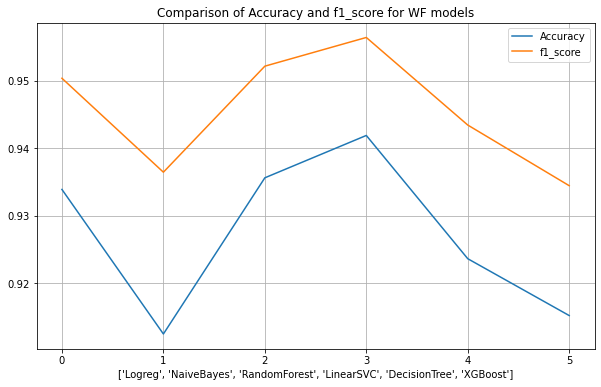

In [90]:
# The best accuracy and f1 score plot for WF
plt.figure(figsize=(10,6))
plt.plot(ACC_WF, label='Accuracy')
plt.plot(f1_WF, label='f1_score')
plt.grid()
plt.legend()
plt.title('Comparison of Accuracy and f1_score for WF models')
plt.xlabel(['Logreg', 'NaiveBayes', 'RandomForest', 'LinearSVC', 'DecisionTree', 'XGBoost'])

Here, SVM (linearSVC) model has the highest accuracy and f1_score for the feature method of WF as seen in the plot. 

Text(0.5, 0, "['Logreg', 'NaiveBayes', 'RandomForest', 'LinearSVC', 'DecisionTree', 'XGBoost']")

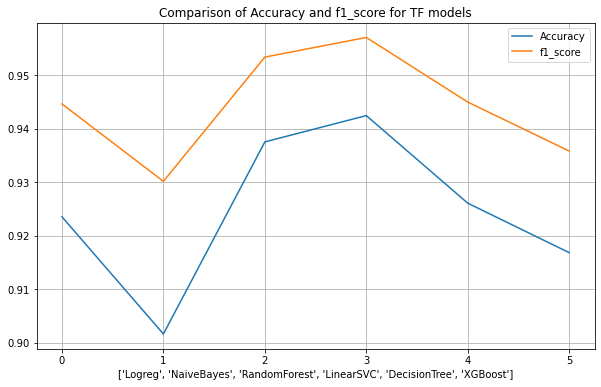

In [91]:
# The best accuracy and f1 score plot for TF-IDF
plt.figure(figsize=(10,6))
plt.plot(ACC_TF, label='Accuracy')
plt.plot(f1_TF, label='f1_score')
plt.grid()
plt.legend()
plt.title('Comparison of Accuracy and f1_score for TF models')
plt.xlabel(['Logreg', 'NaiveBayes', 'RandomForest', 'LinearSVC', 'DecisionTree', 'XGBoost'])

For TF-IDF also, the maximum accuracy and f1_score is given by the SVM (linearSVC) model. 

## Implementatin on Election_df

In [92]:
election_df['model_cleaned'] = election_df['text_cleaned'].str.join(' ')
election_df.head()

,sentiment,negative_reason,text,text1,text1_wo_sw,text_cleaned,length,sent_cleaned,model_cleaned
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",instead your suggestion about agree that #cana...,"[instead, suggestion, agree, #canadian, #women...","[instead, suggestion, agree, #canadian, #women...",285,instead suggestion agree #canadian #women trus...,instead suggestion agree #canadian #women trus...
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",#allwomanspacewalk real n#etobicokenorth #city...,"[#allwomanspacewalk, real, n#etobicokenorth, #...","[#allwomanspacewalk, real, n#etobicokenorth, #...",125,#allwomanspacewalk real n#etobicokenorth #city...,#allwomanspacewalk real n#etobicokenorth #city...
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",#brantford going cost billion next years justi...,"[#brantford, going, cost, billion, next, years...","[#brantford, going, cost, billion, next, year,...",131,#brantford going cost billion next years justi...,#brantford going cost billion next year justin...
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",#canada #canadaelection2 #canadavotes n#elxn43...,"[#canada, #canadaelection2, #canadavotes, n#el...","[#canada, #canadaelection2, #canadavotes, n#el...",116,#canada #canadaelection2 #canadavotes n#elxn43...,#canada #canadaelection2 #canadavotes n#elxn43...
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",#canada #taxpayers sick tired having their har...,"[#canada, #taxpayers, sick, tired, hard, earne...","[#canada, #taxpayers, sick, tired, hard, earne...",309,#canada #taxpayers sick tired hard earned dona...,#canada #taxpayers sick tired hard earned dona...


In [93]:
X = election_df['model_cleaned']
senti_map = {'positive':1, 'negative':0}
y = election_df.replace({"sentiment": senti_map})['sentiment']

## WF

In [94]:
ct_vectorise = CountVectorizer(max_features=2000)
X1 = ct_vectorise.fit_transform(X)

## TF-IDF

In [95]:
tfidf_vectorise = TfidfVectorizer(max_features=2000)
X2 = tfidf_vectorise.fit_transform(X)

## SVM Model

In [96]:
def svm(X_train, y_train, X_test, y_test):
    svc = LinearSVC(random_state = 42)
    svc = svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print('Accuracy of support vector classifier on test set: {:.2f}'.format(svc.score(X_test, y_test)))
    print('Accuracy of support vector classifier on train set: {:.2f}'.format(svc.score(X_train, y_train)))
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('accuracy score is ', accuracy_score(y_test, y_pred))
    print('f1 score is ', f1_score(y_test, y_pred))
    return accuracy_score(y_test, y_pred), f1_score(y_test, y_pred), y_pred
    

### WF

In [97]:
SVC_wf_acc, SVC_wf_f1, y_pred_wf = svm(X_ct_train, y_train, X1, y)

Accuracy of support vector classifier on test set: 0.47
Accuracy of support vector classifier on train set: 0.94
Confusion matrix:
[[646 360]
 [778 349]]
              precision    recall  f1-score   support

           0       0.45      0.64      0.53      1006
           1       0.49      0.31      0.38      1127

   micro avg       0.47      0.47      0.47      2133
   macro avg       0.47      0.48      0.46      2133
weighted avg       0.47      0.47      0.45      2133

accuracy score is  0.4664791373652133
f1 score is  0.3801742919389978


### TF-IDF

In [98]:
SVC_tf_acc, SVC_tf_f1, y_pred_tf = svm(X_tfidf_train, y_train, X2, y)

Accuracy of support vector classifier on test set: 0.47
Accuracy of support vector classifier on train set: 0.94
Confusion matrix:
[[524 482]
 [642 485]]
              precision    recall  f1-score   support

           0       0.45      0.52      0.48      1006
           1       0.50      0.43      0.46      1127

   micro avg       0.47      0.47      0.47      2133
   macro avg       0.48      0.48      0.47      2133
weighted avg       0.48      0.47      0.47      2133

accuracy score is  0.47304266291608066
f1 score is  0.46322827125119387


It is observed that the TF-IDF gives better score of accuracy 47.30% than the WF accuracy 46.64%. So, the further process is done using the TF-IDF. 

In [99]:
e_df['pred_sentiment'] = pd.Series(y_pred_tf).map({0:'negative', 1:'positive'})
e_df[:-50]

,sentiment,negative_reason,text1_wo_sw,text_cleaned,length,party,pred_sentiment
0,negative,Women Reproductive right and Racism,"[instead, suggestion, agree, #canadian, #women...","[instead, suggestion, agree, #canadian, #women...",285,None,positive
1,positive,NaN,"[#allwomanspacewalk, real, n#etobicokenorth, #...","[#allwomanspacewalk, real, n#etobicokenorth, #...",125,None,negative
2,negative,Economy,"[#brantford, going, cost, billion, next, years...","[#brantford, going, cost, billion, next, year,...",131,Liberal,positive
3,positive,NaN,"[#canada, #canadaelection2, #canadavotes, n#el...","[#canada, #canadaelection2, #canadavotes, n#el...",116,None,positive
4,negative,Economy,"[#canada, #taxpayers, sick, tired, hard, earne...","[#canada, #taxpayers, sick, tired, hard, earne...",309,None,positive
...,...,...,...,...,...,...,...
2078,positive,NaN,"[prime, minister, canada, nthe, never, going, ...","[prime, minister, canada, nthe, never, going, ...",273,Lpc & Cpc,positive
2079,negative,Scandal,"[next, prime, minister, canada, offered, black...","[next, prime, minister, canada, offered, black...",276,None,positive
2080,negative,Others,"[need, conservative, majority, n#elxn43]","[need, conservative, majority, n#elxn43]",103,Conservative,negative
2081,positive,NaN,"[x99t, scheer, confirm, warren, kinsella, time...","[x99t, scheer, confirm, warren, kinsella, time...",257,Lpc & Cpc,positive


Text(0, 0.5, 'Frequency of tweet')

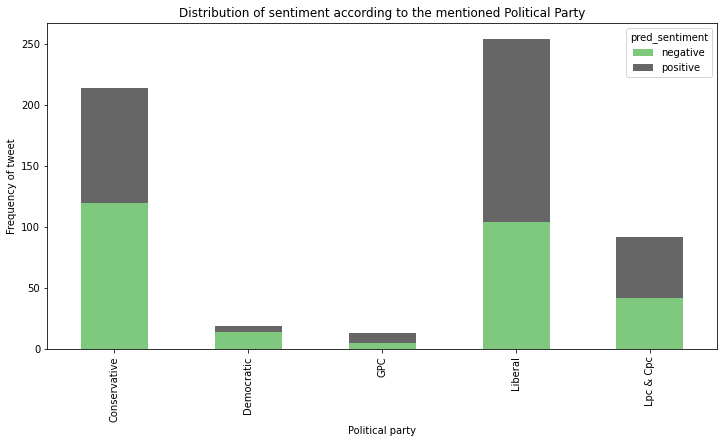

In [100]:
e_df3 = e_df[e_df['party'] != 'None']
e_df3['ct'] = 1
e_df3 = pd.pivot_table(e_df3, values = 'ct', index='party', columns='pred_sentiment', aggfunc = np.sum, fill_value=0)
ax = e_df3.plot.bar(stacked=True, figsize = (12,6), colormap='Accent')
ax.set_title('Distribution of sentiment according to the mentioned Political Party')
ax.set_xlabel('Political party')
ax.set_ylabel('Frequency of tweet')

Based on the given train data, the canadian tweets is analysed for the positive and negative sentiment. 
<br>

The predicted sentiment shows most of the tweets are for Liberal and conservative party. For the liberal party, there are more positive sentiment predicted than negative. While for the conservative party, the tweets predicted are mostly negative. 
<br>

This can imply that the people are more in favour of the Liberal and the people are negative towards conservative. But this difference is very less according to the prediction. 
<br>
<br>
For Democratic party also, the sentiment analysed are mostly negative. 

In [101]:
e_df3

pred_sentiment,negative,positive
party,,
Conservative,120,94
Democratic,14,5
GPC,5,8
Liberal,104,150
Lpc & Cpc,42,50


In [102]:
e_df['pred_type'] = 0
for i in range (e_df.shape[0]):
    if e_df['sentiment'][i] == e_df['pred_sentiment'][i]:
        e_df['pred_type'][i] = 'True'
    else:
        e_df['pred_type'][i] = 'False'


In [103]:
e_df

,sentiment,negative_reason,text1_wo_sw,text_cleaned,length,party,pred_sentiment,pred_type
0,negative,Women Reproductive right and Racism,"[instead, suggestion, agree, #canadian, #women...","[instead, suggestion, agree, #canadian, #women...",285,None,positive,False
1,positive,NaN,"[#allwomanspacewalk, real, n#etobicokenorth, #...","[#allwomanspacewalk, real, n#etobicokenorth, #...",125,None,negative,False
2,negative,Economy,"[#brantford, going, cost, billion, next, years...","[#brantford, going, cost, billion, next, year,...",131,Liberal,positive,False
3,positive,NaN,"[#canada, #canadaelection2, #canadavotes, n#el...","[#canada, #canadaelection2, #canadavotes, n#el...",116,None,positive,True
4,negative,Economy,"[#canada, #taxpayers, sick, tired, hard, earne...","[#canada, #taxpayers, sick, tired, hard, earne...",309,None,positive,False
...,...,...,...,...,...,...,...,...
2128,negative,Scandal,"[know, good, enough, smearing, campaign, right...","[know, good, enough, smearing, campaign, right...",245,None,negative,True
2129,negative,Scandal,"[missed, comment, deflecting, issue, answer, b...","[missed, comment, deflecting, issue, answer, b...",284,None,negative,True
2130,positive,NaN,"[daily, reminder, endorses, strategic, voting,...","[daily, reminder, endorses, strategic, voting,...",134,None,negative,False
2131,negative,Women Reproductive right and Racism,"[going, reopen, abortion, debate, n#elxn43, #s...","[going, reopen, abortion, debate, n#elxn43, #s...",129,None,negative,True


In [104]:
e_df_lpc = e_df[e_df['party']=='Liberal']
e_df_cpc = e_df[e_df['party']=='Conservative']
e_df_ndp = e_df[e_df['party']=='Democratic']
e_df_others = e_df[(e_df['party']!='Democratic') & (e_df['party']!='Liberal') & (e_df['party']!='Conservative')]

Text(0, 0.5, 'Count of Predictions')

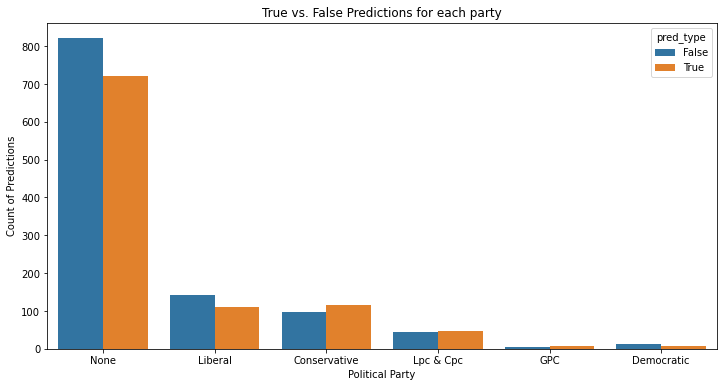

In [105]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="party", data=e_df, hue='pred_type')
ax.set_title('True vs. False Predictions for each party')
ax.set_xlabel('Political Party')
ax.set_ylabel('Count of Predictions')


In the analysis of the true and false prediction, it is seen that the Liberal party and Democratic party has more false prediction. It implies that more than 50% sentiment analysed for the Liberal party are wrong. And it is quite against to infer the people's opinion based on the prediction. 
<br>

Whereas, for the conservative party, more than 50% sentiment analysed are true and it can be said that the people are in negative opinion for them. 
<br>
<br>
For democratic party, more than 50% are false prediction and so we cannot infer that the people's view is negative for the democratic party. 

Text(0, 0.5, 'Count of Predictions')

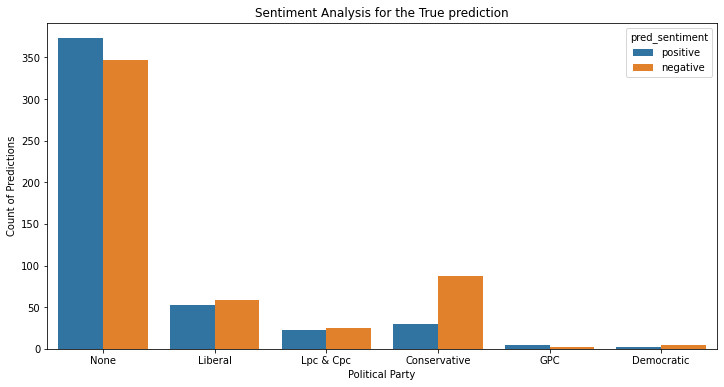

In [106]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="party", data=e_df[e_df['pred_type']=='True'], hue='pred_sentiment')
ax.set_title('Sentiment Analysis for the True prediction')
ax.set_xlabel('Political Party')
ax.set_ylabel('Count of Predictions')


In conclusion, if we analyse the true predicted sentiment only, then it is observed that all the political party, except GPC and None, has negative sentiment. 
<br>

Liberal Party have more positive sentiments predicted but most of them are false. So, the true prediction shows more negative sentiments. 
<br>

Conservative Party have more negative sentiments predicted and most of them are true. So, the true prediction shows more negative sentiments only. 
<br>

In same way, democratic party shows more negative sentiments which are true predictions. 

# Negative sentiment tweets analysis

In [107]:
e_df_neg = election_df[election_df['sentiment']=='negative']

In [108]:
e_df_neg.negative_reason.value_counts()

Others                                 364
Scandal                                270
Tell lies                              198
Economy                                 51
Women Reproductive right and Racism     45
Climate Problem                         41
Separation                              16
Privilege                               12
Healthcare                               5
Healthcare and Marijuana                 4
Name: negative_reason, dtype: int64

Few of the categories are combined as follows: 

1. Economy - this includes 'Economy', 'Privilege', 'Climate Problem'. 
    According to me, this all factor impact the economy and so considered in one category. 
2. Health_Welfare - this includes 'Women Reproductive right and Racism', 'Healthcare', 'Healthcare and Marijuana', 'Separation'. 
    These categories will impact the social welfare and health drastically and so combined into one category. 

The other 3 categories are as same - 'Others', 'Scandal', 'Tell lies' 

In [109]:
# Combining few categories
Economy = ['Economy','Privilege','Climate Problem']
Health_welfare = ['Women Reproductive right and Racism','Healthcare','Healthcare and Marijuana','Separation']
for i in Economy:
    e_df_neg['negative_reason'].replace(i, 'Economy', inplace=True)
for i in Health_welfare:
    e_df_neg['negative_reason'].replace(i, 'Health_Welfare', inplace=True)

In [110]:
e_df_neg.negative_reason.unique()

array(['Health_Welfare', 'Economy', 'Others', 'Scandal', 'Tell lies'],
      dtype=object)

This negative reasons are now Label encoded using the preprocessing LabelEncoder()

In [111]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
e_df_neg['reason_encoded'] = le.fit_transform(e_df_neg['negative_reason'])

In [112]:
e_df_neg

,sentiment,negative_reason,text,text1,text1_wo_sw,text_cleaned,length,sent_cleaned,model_cleaned,reason_encoded
0,negative,Health_Welfare,"b""@RosieBarton So instead of your suggestion, ...",instead your suggestion about agree that #cana...,"[instead, suggestion, agree, #canadian, #women...","[instead, suggestion, agree, #canadian, #women...",285,instead suggestion agree #canadian #women trus...,instead suggestion agree #canadian #women trus...,1
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",#brantford going cost billion next years justi...,"[#brantford, going, cost, billion, next, years...","[#brantford, going, cost, billion, next, year,...",131,#brantford going cost billion next years justi...,#brantford going cost billion next year justin...,0
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",#canada #taxpayers sick tired having their har...,"[#canada, #taxpayers, sick, tired, hard, earne...","[#canada, #taxpayers, sick, tired, hard, earne...",309,#canada #taxpayers sick tired hard earned dona...,#canada #taxpayers sick tired hard earned dona...,0
5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...",#canadavotes2 #elxn43 #cdnpoli facts #blastfro...,"[#canadavotes2, #elxn43, #cdnpoli, facts, #bla...","[#canadavotes2, #elxn43, #cdnpoli, fact, #blas...",280,#canadavotes2 #elxn43 #cdnpoli facts #blastfro...,#canadavotes2 #elxn43 #cdnpoli fact #blastfrom...,2
8,negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...",#chooseforward #cdnpoli #elxn43 ncanada make a...,"[#chooseforward, #cdnpoli, #elxn43, ncanada, m...","[#chooseforward, #cdnpoli, #elxn43, ncanada, m...",132,#chooseforward #cdnpoli #elxn43 ncanada make a...,#chooseforward #cdnpoli #elxn43 ncanada make a...,2
...,...,...,...,...,...,...,...,...,...,...
2125,negative,Others,b'You can\xe2\x80\x99t be a supervillain of an...,x99t supervillain election failed your jobs n#...,"[x99t, supervillain, election, failed, jobs, n...","[x99t, supervillain, election, failed, job, n#...",123,x99t supervillain election failed jobs n#elxn43,x99t supervillain election failed job n#elxn43,2
2126,negative,Economy,b'You care about limiting #ClimateChange and a...,care about limiting #climatechange wondering w...,"[care, limiting, #climatechange, wondering, pa...","[care, limiting, #climatechange, wondering, pa...",281,care limiting #climatechange wondering party v...,care limiting #climatechange wondering party v...,0
2128,negative,Scandal,b'You know he was doing a good enough job smea...,know doing good enough smearing campaign right...,"[know, good, enough, smearing, campaign, right...","[know, good, enough, smearing, campaign, right...",245,know good enough smearing campaign right #cdnp...,know good enough smearing campaign right #cdnp...,3
2129,negative,Scandal,b'You missed the comment. Deflecting the issue...,missed comment deflecting issue does answer be...,"[missed, comment, deflecting, issue, answer, b...","[missed, comment, deflecting, issue, answer, b...",284,missed comment deflecting issue answer best re...,missed comment deflecting issue answer best re...,3


In [113]:
X = e_df_neg['model_cleaned']
y = e_df_neg['reason_encoded']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [115]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(704,)
(302,)
(704,)
(302,)


Considering the WF feature here for this case. 

In [116]:
ct_vectorise = CountVectorizer()
ct_vectorise.fit_transform(X)
X_neg_train = ct_vectorise.transform(X_train)
X_neg_test = ct_vectorise.transform(X_test)
ct_features = ct_vectorise.get_feature_names()

The three models are used here - Logistic Regression, Random Forest, and Multinomial Naive Bayes

### Model 0 - Logistic Regression

In [117]:
logreg = LogisticRegression(random_state=42, solver='saga', C=0.01)
logreg = logreg.fit(X_neg_train, y_train)
y_pred = logreg.predict(X_neg_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_neg_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_neg_train, y_train)))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy score is ', accuracy_score(y_test, y_pred))
print('f1 score is ', f1_score(y_test, y_pred, average='weighted'))
    

Accuracy of logistic regression classifier on test set: 0.47
Accuracy of logistic regression classifier on train set: 0.48
Confusion matrix:
[[  0   0  31   1   0]
 [  0   0  13   1   0]
 [  0   0 118   1   0]
 [  0   0  50  23   0]
 [  0   0  56   7   1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.00      0.00      0.00        14
           2       0.44      0.99      0.61       119
           3       0.70      0.32      0.43        73
           4       1.00      0.02      0.03        64

   micro avg       0.47      0.47      0.47       302
   macro avg       0.43      0.26      0.21       302
weighted avg       0.55      0.47      0.35       302

accuracy score is  0.47019867549668876
f1 score is  0.3517117599484967


### Model 1 - Random Forest

In [118]:
rf = RandomForestClassifier(random_state = 42)
rf = rf.fit(X_neg_train, y_train)
y_pred = rf.predict(X_neg_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_neg_test, y_test)))
print('Accuracy of random forest classifier on train set: {:.2f}'.format(rf.score(X_neg_train, y_train)))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy score is ', accuracy_score(y_test, y_pred))
print('f1 score is ', f1_score(y_test, y_pred, average='weighted'))


Accuracy of random forest classifier on test set: 0.56
Accuracy of random forest classifier on train set: 0.98
Confusion matrix:
[[ 11   0  17   4   0]
 [  0   3   8   1   2]
 [  1   1 104  10   3]
 [  0   3  40  29   1]
 [  2   0  32   8  22]]
              precision    recall  f1-score   support

           0       0.79      0.34      0.48        32
           1       0.43      0.21      0.29        14
           2       0.52      0.87      0.65       119
           3       0.56      0.40      0.46        73
           4       0.79      0.34      0.48        64

   micro avg       0.56      0.56      0.56       302
   macro avg       0.62      0.43      0.47       302
weighted avg       0.61      0.56      0.53       302

accuracy score is  0.5596026490066225
f1 score is  0.5335597466167579


### Model 2 - Multinomial Naive Bayes

In [119]:
nb = MultinomialNB()
nb = nb.fit(X_neg_train, y_train)
y_pred = nb.predict(X_neg_test)
print('Accuracy of multinomial naive bayes classifier on test set: {:.2f}'.format(nb.score(X_neg_test, y_test)))
print('Accuracy of multinomial naive bayes classifier on train set: {:.2f}'.format(nb.score(X_neg_train, y_train)))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy score is ', accuracy_score(y_test, y_pred))
print('f1 score is ', f1_score(y_test, y_pred, average='weighted'))


Accuracy of multinomial naive bayes classifier on test set: 0.50
Accuracy of multinomial naive bayes classifier on train set: 0.97
Confusion matrix:
[[11  0 13  4  4]
 [ 0  3  5  4  2]
 [ 3  2 65 38 11]
 [ 0  0 18 53  2]
 [ 3  0 25 16 20]]
              precision    recall  f1-score   support

           0       0.65      0.34      0.45        32
           1       0.60      0.21      0.32        14
           2       0.52      0.55      0.53       119
           3       0.46      0.73      0.56        73
           4       0.51      0.31      0.39        64

   micro avg       0.50      0.50      0.50       302
   macro avg       0.55      0.43      0.45       302
weighted avg       0.52      0.50      0.49       302

accuracy score is  0.5033112582781457
f1 score is  0.4898847685872038


## HyperParameter Tuning

The tuning of hyperparameter is performed using the GridSearchCV method for all the three models. 

### Model 0 - Logistic Regression

In [120]:
model = LogisticRegression(random_state=42)
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'saga']
c_values = [10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,C=c_values)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_neg_train, y_train)
logreg_predict = grid_result.predict(X_neg_test)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ACC = accuracy_score(y_test, logreg_predict)
print(ACC)
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.528409 using {'C': 1.0, 'solver': 'liblinear'}
0.5662251655629139
0.521307 (0.036542) with: {'C': 10, 'solver': 'newton-cg'}
0.521307 (0.036542) with: {'C': 10, 'solver': 'lbfgs'}
0.524148 (0.034952) with: {'C': 10, 'solver': 'liblinear'}
0.526989 (0.033377) with: {'C': 10, 'solver': 'saga'}
0.522727 (0.017769) with: {'C': 1.0, 'solver': 'newton-cg'}
0.522727 (0.017769) with: {'C': 1.0, 'solver': 'lbfgs'}
0.528409 (0.022241) with: {'C': 1.0, 'solver': 'liblinear'}
0.526989 (0.032180) with: {'C': 1.0, 'solver': 'saga'}
0.475852 (0.021417) with: {'C': 0.1, 'solver': 'newton-cg'}
0.475852 (0.021417) with: {'C': 0.1, 'solver': 'lbfgs'}
0.494318 (0.022386) with: {'C': 0.1, 'solver': 'liblinear'}
0.494318 (0.019172) with: {'C': 0.1, 'solver': 'saga'}
0.386364 (0.015731) with: {'C': 0.01, 'solver': 'newton-cg'}
0.386364 (0.015731) with: {'C': 0.01, 'solver': 'lbfgs'}
0.411932 (0.015707) with: {'C': 0.01, 'solver': 'liblinear'}
0.403409 (0.020626) with: {'C': 0.01, 'solver': 'saga'}


The best result for the logistic regression is C = 1 and solver = liblinear

### Model 1 - Random Forest

In [121]:
model = RandomForestClassifier(random_state=42)
criterion = ['gini', 'entropy']
n_estimators = [10, 50, 100, 500]
# define grid search
grid = dict(n_estimators=n_estimators,criterion=criterion)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_neg_train, y_train)
rfc_predict = grid_result.predict(X_neg_test)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ACC = accuracy_score(y_test, logreg_predict)
print(ACC)
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.534091 using {'criterion': 'gini', 'n_estimators': 500}
0.5662251655629139
0.485795 (0.014217) with: {'criterion': 'gini', 'n_estimators': 10}
0.519886 (0.020862) with: {'criterion': 'gini', 'n_estimators': 50}
0.517045 (0.010335) with: {'criterion': 'gini', 'n_estimators': 100}
0.534091 (0.011813) with: {'criterion': 'gini', 'n_estimators': 500}
0.480114 (0.037137) with: {'criterion': 'entropy', 'n_estimators': 10}
0.502841 (0.020123) with: {'criterion': 'entropy', 'n_estimators': 50}
0.502841 (0.033851) with: {'criterion': 'entropy', 'n_estimators': 100}
0.521307 (0.021053) with: {'criterion': 'entropy', 'n_estimators': 500}


The best parameters for the random forest classifier is criterion = gini, and n_estimators = 500

### Model 2 - Multinomial Naive Bayes

In [122]:
model = MultinomialNB()
alpha = [0, 0.5, 1, 5, 10, 50, 100]
# define grid search
grid = dict(alpha=alpha)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_neg_train, y_train)
mnb_predict = grid_result.predict(X_neg_test)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ACC = accuracy_score(y_test, logreg_predict)
print(ACC)
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.508523 using {'alpha': 0.5}
0.5662251655629139
0.419034 (0.022261) with: {'alpha': 0}
0.508523 (0.024383) with: {'alpha': 0.5}
0.495739 (0.040011) with: {'alpha': 1}
0.467330 (0.022588) with: {'alpha': 5}
0.444602 (0.011818) with: {'alpha': 10}
0.404830 (0.016830) with: {'alpha': 50}
0.380682 (0.011583) with: {'alpha': 100}


The best parameter for the naive bayes model is alpha = 0.5

### Running the optimized solution

In [123]:
# Assigning the accuracy and f1 score vector
ACC_neg = []
f1_neg = []

### Model 0 - Logistic Regression with Optimized parameter

In [124]:
logreg = LogisticRegression(random_state=42, solver='liblinear', C=1)
logreg = logreg.fit(X_neg_train, y_train)
y_pred_lr = logreg.predict(X_neg_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_neg_test, y_test)))
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_neg_train, y_train)))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print('accuracy score is ', accuracy_score(y_test, y_pred_lr))
print('f1 score is ', f1_score(y_test, y_pred_lr, average='weighted'))
ACC_neg.append(accuracy_score(y_test, y_pred_lr))
f1_neg.append(f1_score(y_test, y_pred_lr, average='weighted'))

Accuracy of logistic regression classifier on test set: 0.57
Accuracy of logistic regression classifier on train set: 0.99
Confusion matrix:
[[11  0 18  3  0]
 [ 0  4  6  3  1]
 [ 0  0 92 18  9]
 [ 1  0 31 40  1]
 [ 2  1 25 12 24]]
              precision    recall  f1-score   support

           0       0.79      0.34      0.48        32
           1       0.80      0.29      0.42        14
           2       0.53      0.77      0.63       119
           3       0.53      0.55      0.54        73
           4       0.69      0.38      0.48        64

   micro avg       0.57      0.57      0.57       302
   macro avg       0.67      0.47      0.51       302
weighted avg       0.60      0.57      0.55       302

accuracy score is  0.5662251655629139
f1 score is  0.5518808106797153


### Model 1 - Random Forest with Optimized parameters

In [125]:
rf = RandomForestClassifier(random_state = 42, criterion='gini', n_estimators=500)
rf = rf.fit(X_neg_train, y_train)
y_pred_rf = rf.predict(X_neg_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_neg_test, y_test)))
print('Accuracy of random forest classifier on train set: {:.2f}'.format(rf.score(X_neg_train, y_train)))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print('accuracy score is ', accuracy_score(y_test, y_pred_rf))
print('f1 score is ', f1_score(y_test, y_pred_rf, average='weighted'))
ACC_neg.append(accuracy_score(y_test, y_pred_rf))
f1_neg.append(f1_score(y_test, y_pred_rf, average='weighted'))

Accuracy of random forest classifier on test set: 0.57
Accuracy of random forest classifier on train set: 1.00
Confusion matrix:
[[ 10   0  20   1   1]
 [  0   5   7   1   1]
 [  1   0 103  15   0]
 [  0   0  38  33   2]
 [  2   0  36   4  22]]
              precision    recall  f1-score   support

           0       0.77      0.31      0.44        32
           1       1.00      0.36      0.53        14
           2       0.50      0.87      0.64       119
           3       0.61      0.45      0.52        73
           4       0.85      0.34      0.49        64

   micro avg       0.57      0.57      0.57       302
   macro avg       0.75      0.47      0.52       302
weighted avg       0.65      0.57      0.55       302

accuracy score is  0.5728476821192053
f1 score is  0.5520240956286877


### Model 2 - Multinomial naive bayes with Optimized parameter

In [126]:
nb = MultinomialNB(alpha=0.5)
nb = nb.fit(X_neg_train, y_train)
y_pred_mnb = nb.predict(X_neg_test)
print('Accuracy of multinomial naive bayes classifier on test set: {:.2f}'.format(nb.score(X_neg_test, y_test)))
print('Accuracy of multinomial naive bayes classifier on train set: {:.2f}'.format(nb.score(X_neg_train, y_train)))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred_mnb))
print(classification_report(y_test, y_pred_mnb))
print('accuracy score is ', accuracy_score(y_test, y_pred_mnb))
print('f1 score is ', f1_score(y_test, y_pred_mnb, average='weighted'))
ACC_neg.append(accuracy_score(y_test, y_pred_mnb))
f1_neg.append(f1_score(y_test, y_pred_mnb, average='weighted'))


Accuracy of multinomial naive bayes classifier on test set: 0.48
Accuracy of multinomial naive bayes classifier on train set: 0.98
Confusion matrix:
[[16  0  9  4  3]
 [ 0  3  4  3  4]
 [ 6  5 51 35 22]
 [ 2  0 16 48  7]
 [ 3  3 17 14 27]]
              precision    recall  f1-score   support

           0       0.59      0.50      0.54        32
           1       0.27      0.21      0.24        14
           2       0.53      0.43      0.47       119
           3       0.46      0.66      0.54        73
           4       0.43      0.42      0.43        64

   micro avg       0.48      0.48      0.48       302
   macro avg       0.46      0.44      0.44       302
weighted avg       0.48      0.48      0.48       302

accuracy score is  0.48013245033112584
f1 score is  0.47588144176163644


Text(0.5, 0, "['LogReg', 'RandomForest', 'NaiveBayes']")

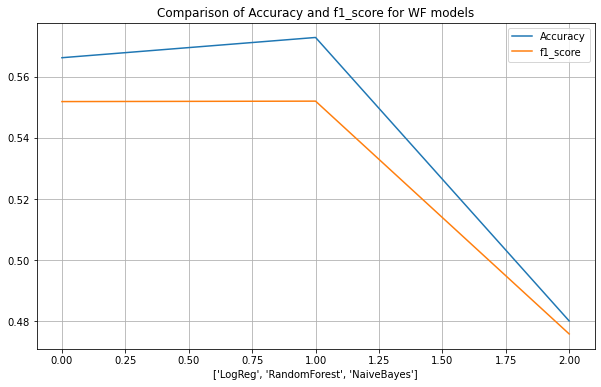

In [137]:
# The best accuracy and f1 score plot
plt.figure(figsize=(10,6))
plt.plot(ACC_neg, label='Accuracy')
plt.plot(f1_neg, label='f1_score')
plt.grid()
plt.legend()
plt.title('Comparison of Accuracy and f1_score for WF models')
plt.xlabel(['LogReg', 'RandomForest', 'NaiveBayes'])

It is observed that the RandomForest Classifier gives the best result among the three models with the accuracy of 57.28% and the f1 score of 55.20%. So, proceeding with the y prediction of RandomForest Classifier and analysing the result for the reasons of negative sentiments. 

### Analysis of the result

In [128]:
# Taking y prediction of the random forest optimized model
y_pred_rf

array([2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 4, 3, 2, 3, 2, 2, 2, 2, 2,
       4, 3, 0, 4, 2, 2, 3, 2, 2, 4, 0, 4, 2, 4, 2, 2, 2, 2, 2, 3, 4, 2,
       1, 2, 0, 2, 3, 2, 2, 0, 3, 2, 2, 2, 4, 2, 4, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 3, 1, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 3, 0, 4, 2, 2, 2,
       3, 2, 4, 4, 2, 4, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4,
       2, 2, 2, 0, 1, 2, 4, 2, 3, 4, 2, 2, 2, 4, 0, 3, 2, 2, 4, 2, 2, 2,
       2, 3, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 1, 2,
       3, 2, 2, 3, 3, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 3, 2, 3, 3,
       2, 3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 4, 2, 2, 4, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 4,
       3, 3, 2, 0, 2, 4, 2, 2, 2, 2, 2, 1, 2, 2, 2, 4, 2, 3, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2,
       3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [129]:
column = 'Economy', 'Health_Welfare', 'Others', 'Scandal', 'Tell lies'

In [130]:
pred_reason = pd.Series(y_pred_rf).map({0:'Economy', 1:'Health_Welfare', 2:'Others', 3:'Scandal', 4:'Tell lies'})
orig_reason = pd.Series(y_test).map({0:'Economy', 1:'Health_Welfare', 2:'Others', 3:'Scandal', 4:'Tell lies'})

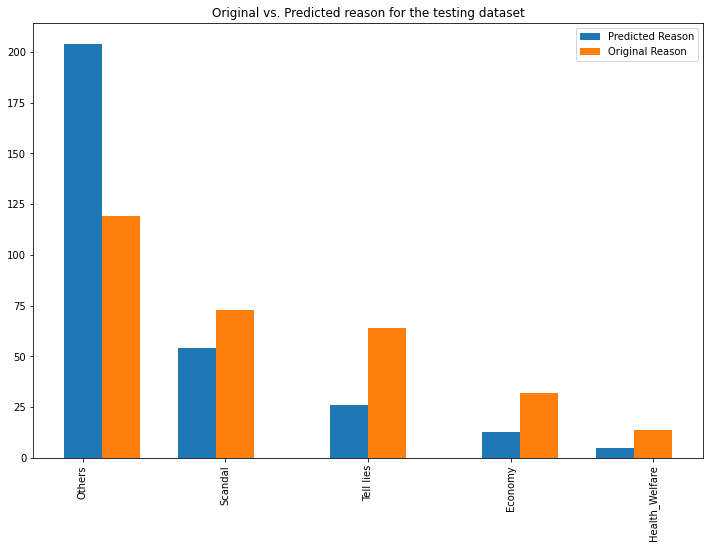

In [131]:
plt.figure(figsize = (12,8))
plt.hist(pred_reason, bins=15, align='left', label='Predicted Reason')
plt.hist(orig_reason, bins=15, align='right', label='Original Reason')
plt.xticks(rotation=90)
plt.legend()
plt.title('Original vs. Predicted reason for the testing dataset')
plt.show()

# Bonus

In [138]:
# Keras TensorFlow model
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [139]:
sentiment_df.head()

,ID,text,label,text_n,text_without_sw,text_cleaned,length,sent_cleaned,model_cleaned
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,josh jenkins looking forward breeders crown su...,"[josh, jenkins, looking, forward, breeders, cr...","[josh, jenkins, looking, forward, breeder, cro...",68,josh jenkins looking forward breeders crown su...,josh jenkins looking forward breeder crown sup...
1,7.680980e+17,RT : Congratulations Pakistan on becoming #No1...,1,congratulations pakistan becoming #no1testteam...,"[congratulations, pakistan, becoming, #no1test...","[congratulation, pakistan, becoming, #no1testt...",110,congratulations pakistan becoming #no1testteam...,congratulation pakistan becoming #no1testteam ...
2,7.680980e+17,"RT : This September, is taking you to Maine M...",1,this september taking maine mendoza surprise t...,"[september, taking, maine, mendoza, surprise, ...","[september, taking, maine, mendoza, surprise, ...",108,september taking maine mendoza surprise thanks...,september taking maine mendoza surprise thanks...
3,7.680980e+17,"RT : Newly painted walls, thanks a million to ...",1,newly painted walls thanks million custodial p...,"[newly, painted, walls, thanks, million, custo...","[newly, painted, wall, thanks, million, custod...",113,newly painted walls thanks million custodial p...,newly painted wall thanks million custodial pa...
4,7.680980e+17,RT : Excited to announce: as of July 2017 Fesc...,1,excited announce july feschotte will relocating,"[excited, announce, july, feschotte, relocating]","[excited, announce, july, feschotte, relocating]",83,excited announce july feschotte relocating,excited announce july feschotte relocating


In [140]:
X = sentiment_df['model_cleaned']
y = sentiment_df['label']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [142]:
# Taking max features to be 2000
ct_vectorise = CountVectorizer(max_features=5000)
ct_vectorise.fit_transform(X)
X_train = ct_vectorise.transform(X_train)
X_test = ct_vectorise.transform(X_test)
ct_features = ct_vectorise.get_feature_names()

In [143]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(5000,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [144]:
# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [145]:
# fit the keras model on the dataset
history = model.fit(X_train, y_train, epochs=10, batch_size=200, verbose=1)

Epoch 1/10
385273/385273 [==============================] - 186s 483us/step - loss: 0.0495 - acc: 0.9371
Epoch 2/10
385273/385273 [==============================] - 187s 485us/step - loss: 0.0336 - acc: 0.9559
Epoch 3/10
385273/385273 [==============================] - 186s 484us/step - loss: 0.0327 - acc: 0.9576s - los
Epoch 4/10
385273/385273 [==============================] - 188s 488us/step - loss: 0.0321 - acc: 0.9583
Epoch 5/10
385273/385273 [==============================] - 186s 483us/step - loss: 0.0314 - acc: 0.9591
Epoch 6/10
385273/385273 [==============================] - 187s 485us/step - loss: 0.0307 - acc: 0.9600
Epoch 7/10
385273/385273 [==============================] - 189s 490us/step - loss: 0.0296 - acc: 0.9615
Epoch 8/10
385273/385273 [==============================] - 196s 508us/step - loss: 0.0284 - acc: 0.9630
Epoch 9/10
385273/385273 [==============================] - 190s 494us/step - loss: 0.0270 - acc: 0.9653
Epoch 10/10
385273/385273 [=====================

In [146]:
score = model.evaluate(X_test, y_test, verbose=1)

165118/165118 [==============================] - 76s 463us/step


In [147]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.034439170060727484
Test Accuracy: 0.9561041194731376


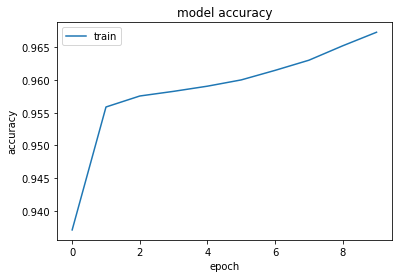

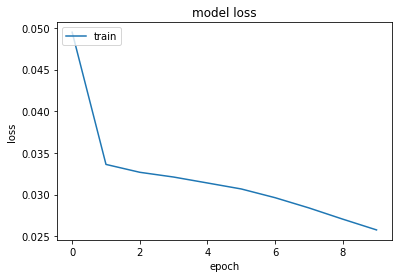

In [148]:
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [149]:
election_df.head()

,sentiment,negative_reason,text,text1,text1_wo_sw,text_cleaned,length,sent_cleaned,model_cleaned
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",instead your suggestion about agree that #cana...,"[instead, suggestion, agree, #canadian, #women...","[instead, suggestion, agree, #canadian, #women...",285,instead suggestion agree #canadian #women trus...,instead suggestion agree #canadian #women trus...
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",#allwomanspacewalk real n#etobicokenorth #city...,"[#allwomanspacewalk, real, n#etobicokenorth, #...","[#allwomanspacewalk, real, n#etobicokenorth, #...",125,#allwomanspacewalk real n#etobicokenorth #city...,#allwomanspacewalk real n#etobicokenorth #city...
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",#brantford going cost billion next years justi...,"[#brantford, going, cost, billion, next, years...","[#brantford, going, cost, billion, next, year,...",131,#brantford going cost billion next years justi...,#brantford going cost billion next year justin...
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",#canada #canadaelection2 #canadavotes n#elxn43...,"[#canada, #canadaelection2, #canadavotes, n#el...","[#canada, #canadaelection2, #canadavotes, n#el...",116,#canada #canadaelection2 #canadavotes n#elxn43...,#canada #canadaelection2 #canadavotes n#elxn43...
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",#canada #taxpayers sick tired having their har...,"[#canada, #taxpayers, sick, tired, hard, earne...","[#canada, #taxpayers, sick, tired, hard, earne...",309,#canada #taxpayers sick tired hard earned dona...,#canada #taxpayers sick tired hard earned dona...


In [150]:
X_election_test = election_df['model_cleaned']

In [151]:
# Taking max features to be 2000
ct_vectorise = CountVectorizer(max_features=5000)
X_elec_test = ct_vectorise.fit_transform(X_election_test)

In [152]:
prediction = model.predict(X_elec_test)

In [153]:
prediction

array([[6.5016743e-06],
       [7.5901282e-01],
       [6.6223147e-04],
       ...,
       [9.6646893e-01],
       [9.2941892e-01],
       [7.6805251e-03]], dtype=float32)

(array([1675.,   29.,   17.,   21.,   13.,   18.,   16.,   20.,   30.,
         294.]),
 array([1.1355927e-16, 1.0000000e-01, 2.0000000e-01, 3.0000001e-01,
        4.0000001e-01, 5.0000000e-01, 6.0000002e-01, 6.9999999e-01,
        8.0000001e-01, 8.9999998e-01, 1.0000000e+00], dtype=float32),
 <BarContainer object of 10 artists>)

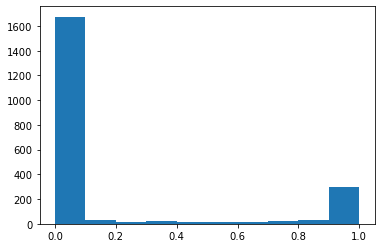

In [154]:
plt.hist(prediction)

(array([1006.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1127.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

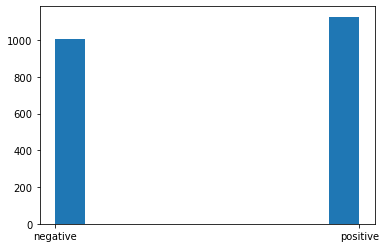

In [155]:
plt.hist(election_df['sentiment'])